# Explore here

# **PREDICIENDO LA DIABETES**

# **Paso 0. Importación de las librerías necesarias**

In [3]:
# Your code here
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para trazar gráficos:
import matplotlib.pyplot as plt

# Librería para poder realizar la partición del conjunto de datos:
from sklearn.model_selection import train_test_split

# Librería para seleccionar características con SelectKBest:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

# Librería para cargar el conjunto de datos
from sklearn.datasets import load_iris

# Librería para utilizar árboles de decisión clasificadores:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text


## **Paso 1. Lectura de datos.**

Lo primero que haremos será leer y guardar en una variable la información para trabajar con ella.

Para ello se guarda el archivo con los datos en la ruta: https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv   y se carga en un DataFrame.

In [4]:
# Importamos el archivo:
data = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

# Se muestran las primeras filas del DataFrame:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Pregnacies: Número de embarazos del paciente (numérico)
- Glucose: Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- BloodPressure:  Presión arterial diastólica (medida en mm Hg) (numérico)
- SkinThickness: Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- Insulin: Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- BMI: Índice de masa corporal (numérico)
- DiabetesPedigreeFunction: Función de pedigrí de diabetes (numérico)
- Age: Edad del paciente (numérico)
- Outcome: Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

## **Paso 2 Exploración y limpieza de datos**

### **Paso 2.1 Comprensión de las características.**

In [5]:
# Recurrimos as atributo shape para describir la información que contiene:
print(f"El conjunto de datos cunta con información a cerca de {data.shape[0]} pacientes, a través de {data.shape[1]} características específicas de cada uno.")

El conjunto de datos cunta con información a cerca de 768 pacientes, a través de 9 características específicas de cada uno.


### **Paso 2.2 Identificación de valores duplicados o nulos**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- También sabemos que no existen valores nulos en la totalidad del conjunto.
- Y que de las 9 características nombradas anterioremente todas son numéricas.

In [7]:
# Visulización de valores duplicados.
print(f"Hay un total de {data.duplicated().sum()} valores duplicados.")

Hay un total de 0 valores duplicados.


## **Paso 3. Análisis univariado.**

### **Paso 3.1 Análisis de variables categóricas**

En este caso no existen variables categóricas.

### **Paso 3.2 Análisis de variables numéricas.**

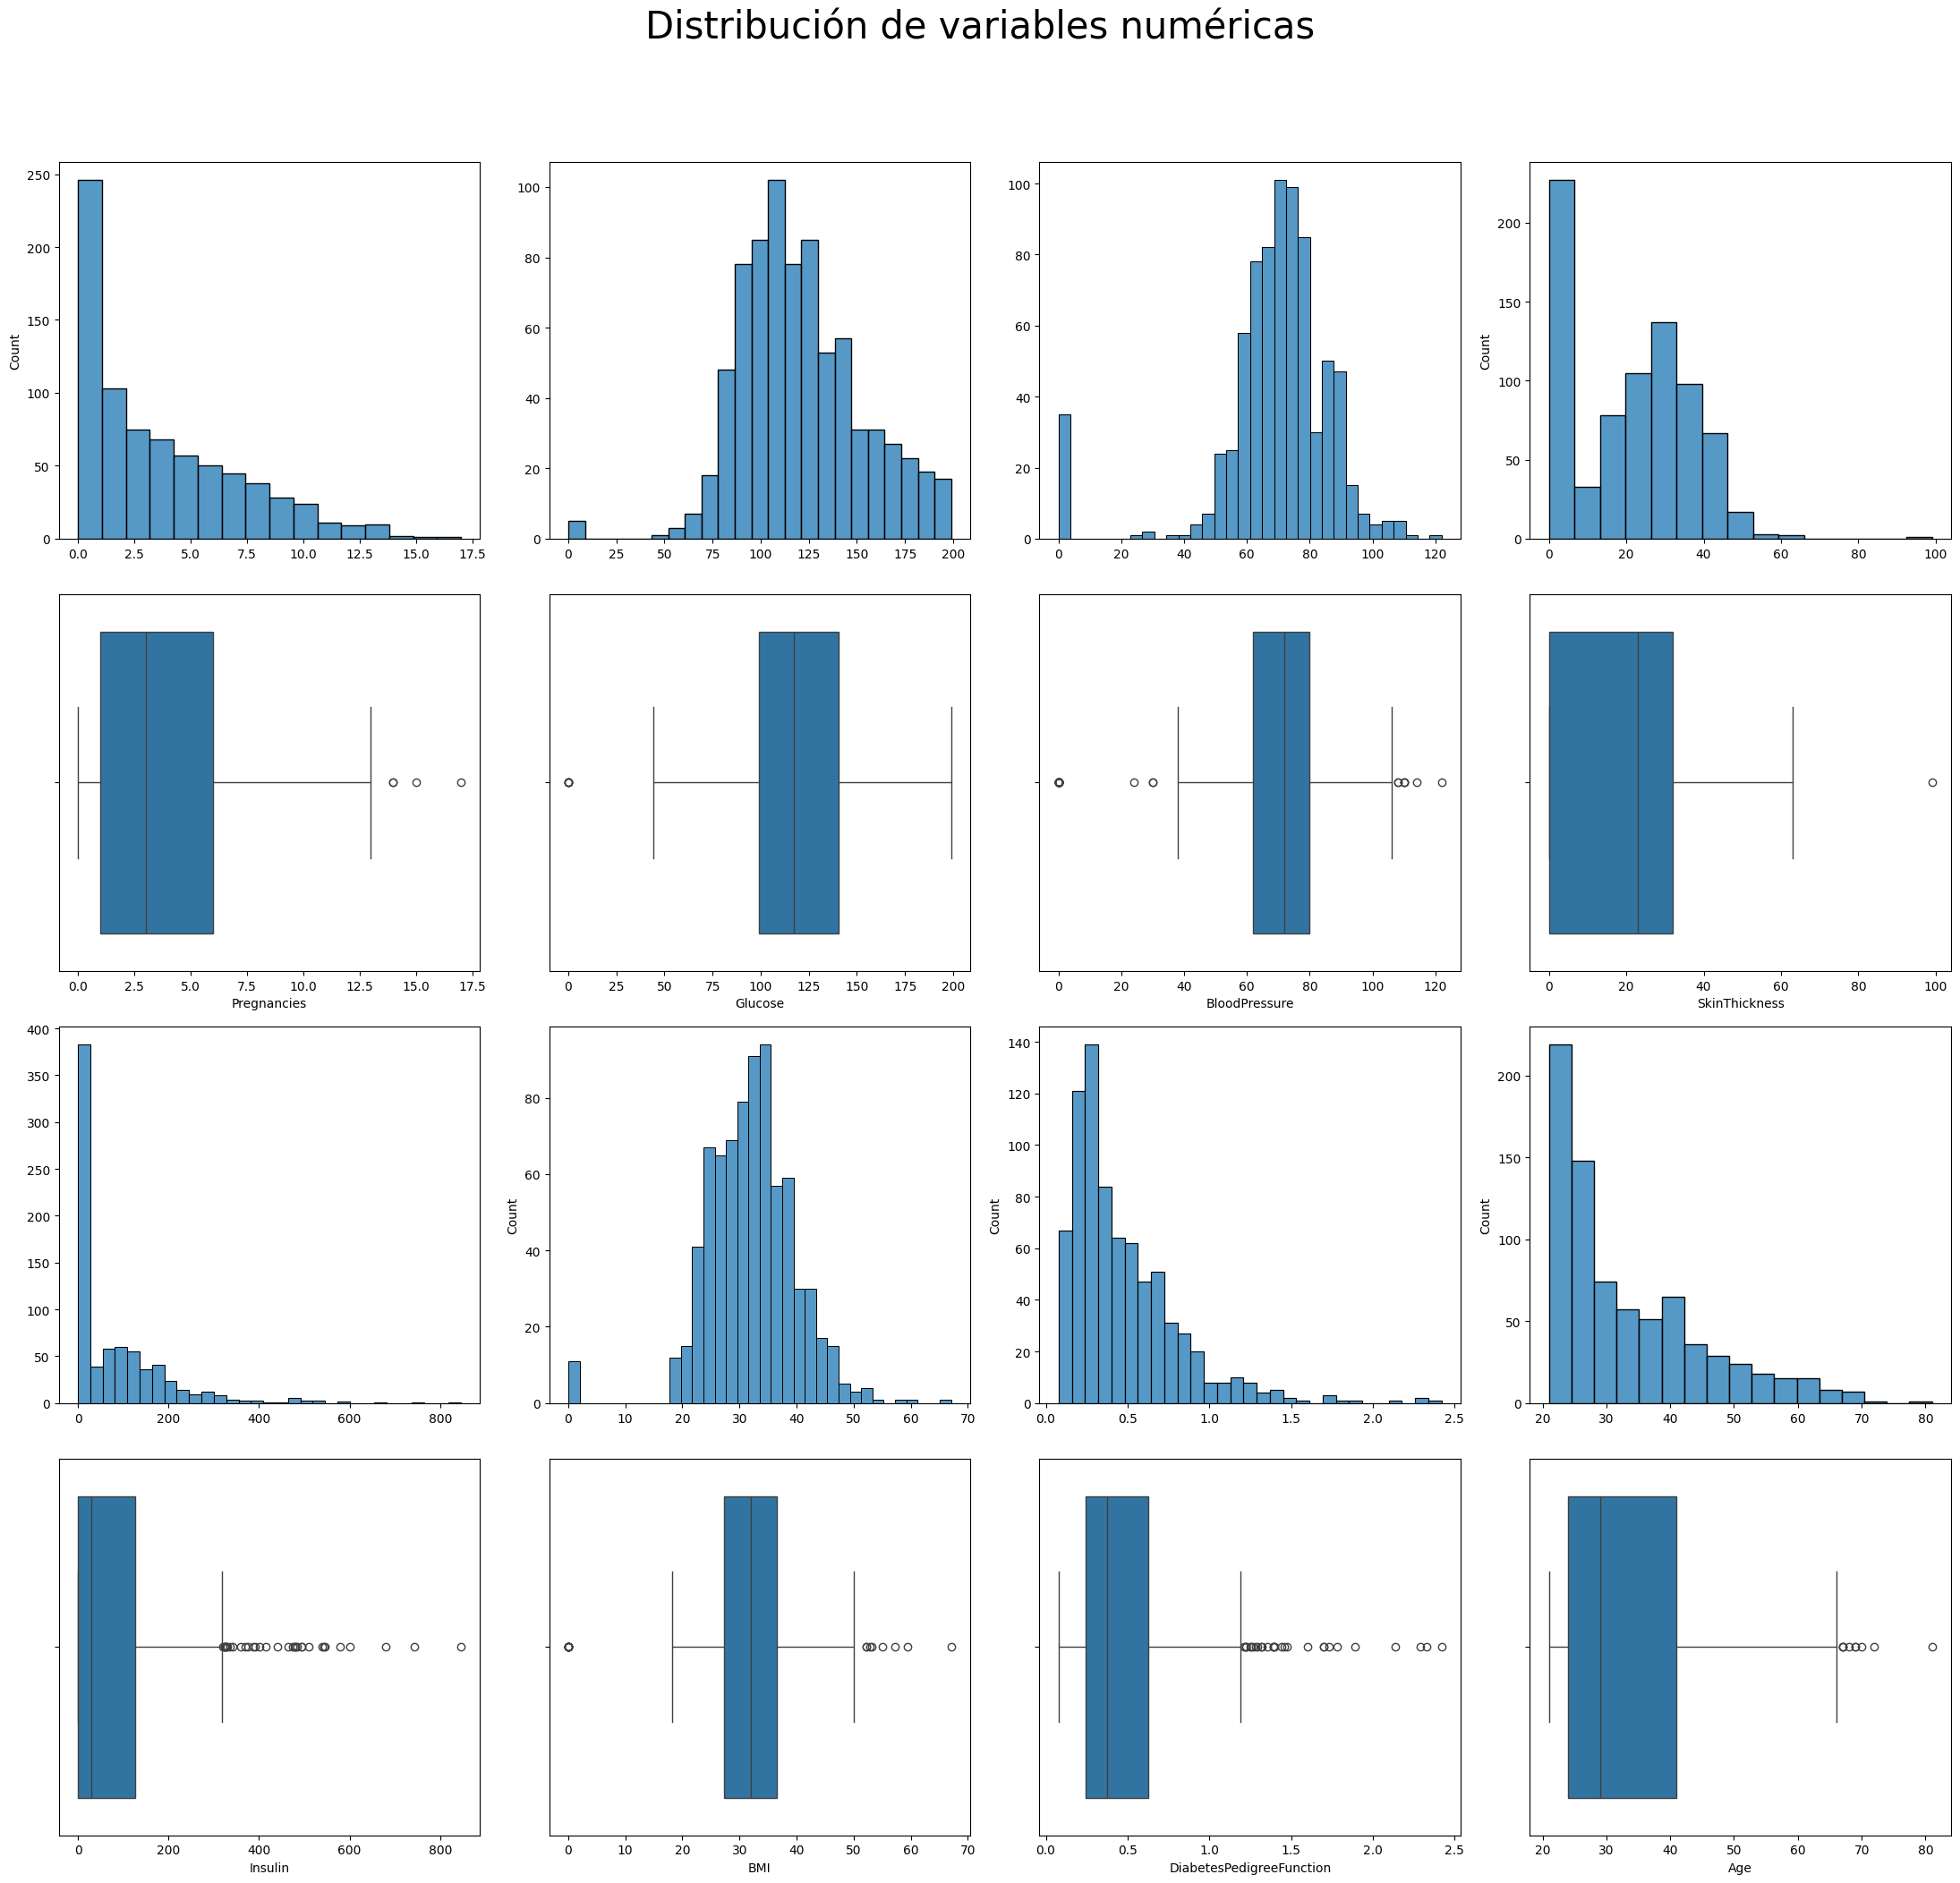

In [8]:
# Creamos la figura para los histogramas y diagramas de caja
fig, axis = plt.subplots(4, 4, figsize=(22,20))

# Título global al conjunto
fig.suptitle("Distribución de variables numéricas", fontsize=30, y=1.05)

# Histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=data, x="Pregnancies").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=data, x="Pregnancies")
sns.histplot(ax=axis[0, 1], data=data, x="Glucose").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=data, x="Glucose")
sns.histplot(ax=axis[0, 2], data=data, x="BloodPressure").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=data, x="BloodPressure")
sns.histplot(ax=axis[0, 3], data=data, x="SkinThickness").set(xlabel=None)
sns.boxplot(ax=axis[1, 3], data=data, x="SkinThickness")
sns.histplot(ax=axis[2, 0], data=data, x="Insulin").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 0], data=data, x="Insulin")
sns.histplot(ax=axis[2, 1], data=data, x="BMI").set(xlabel=None)
sns.boxplot(ax=axis[3, 1], data=data, x="BMI")
sns.histplot(ax=axis[2, 2], data=data, x="DiabetesPedigreeFunction").set(xlabel=None)
sns.boxplot(ax=axis[3, 2], data=data, x="DiabetesPedigreeFunction")
sns.histplot(ax=axis[2, 3], data=data, x="Age").set(xlabel=None)
sns.boxplot(ax=axis[3, 3], data=data, x="Age")

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Análisis de la variable objetivo

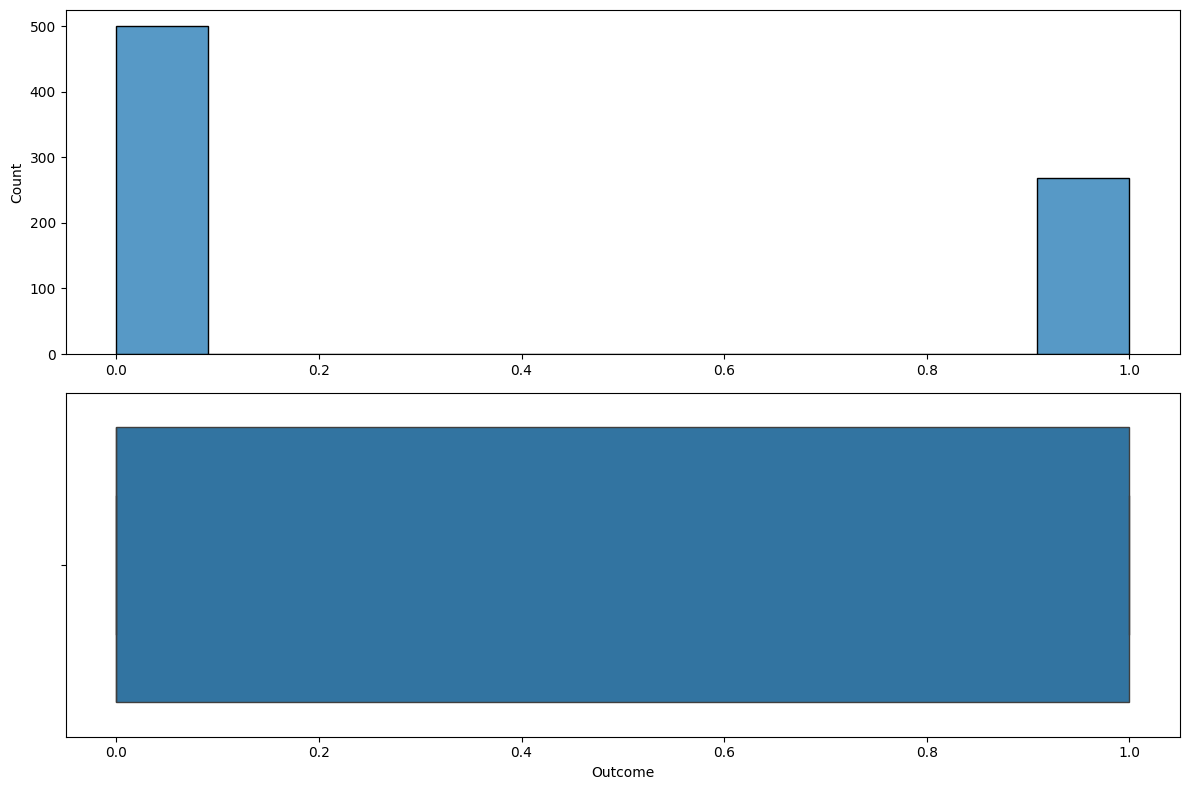

In [9]:
# Crear la figura con 2 subplots en una columna
fig, axis = plt.subplots(2, 1, figsize=(12, 8))

# Histograma y diagrama de caja
sns.histplot(ax=axis[0], data=data, x="Outcome").set(xlabel=None)
sns.boxplot(ax=axis[1], data=data, x="Outcome")

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

## **4 Análisis multivariado**

### **4.1 Análisis de correlaciones**

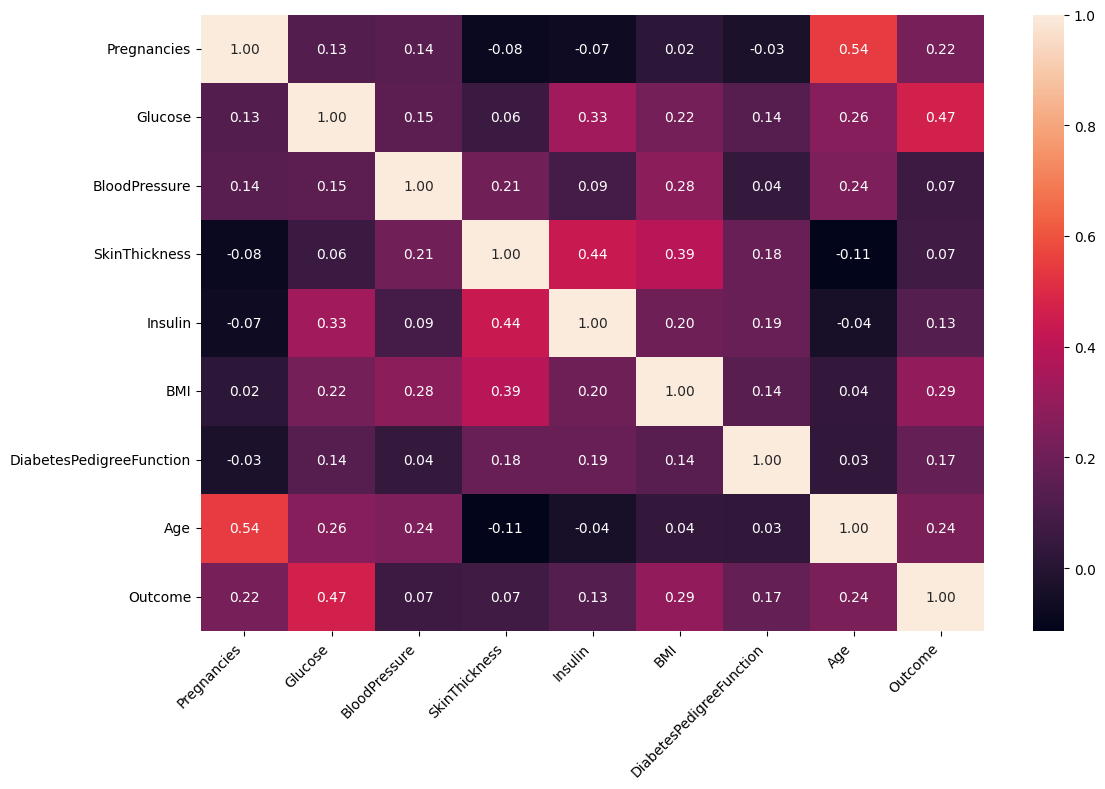

In [10]:
# Definir tamaño de la figura
plt.figure(figsize=(12, 8))

# lista de las variables
variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Graficar el heatmap
sns.heatmap(data[variables].corr(), annot = True, fmt = ".2f")

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseños y mostrar el gráfico
plt.tight_layout()
plt.show()

Observamos que las variables relacionadas con nuestra variable objetivo serían: "Glucose", "BMI" y "Age".

## **5 Ingeniería de características**

### **5.1 Análisis de outlaiers** 

In [11]:
# GLUCOSE

variable = 'Glucose'

# Calcular el primer y tercer cuartil
Q1 = data[variable].quantile(0.25)
Q3 = data[variable].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Aproximar los valores atípicos a los límites (winsorización)
data[variable] = data[variable].clip(lower=limite_inferior, upper=limite_superior)

# Mostrar los límites calculados
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")



Límite inferior: 37.125
Límite superior: 202.125


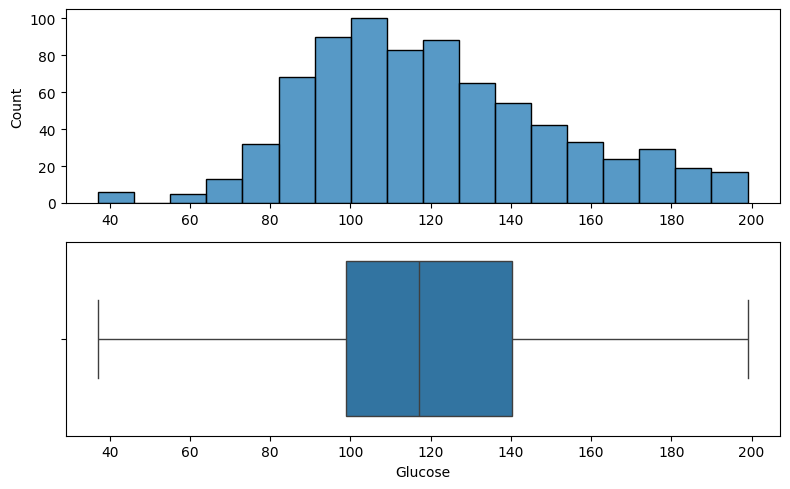

In [12]:
# Crear la figura con 2 subplots en una columna
fig, axis = plt.subplots(2, 1, figsize=(8, 5))

# Histograma y diagrama de caja
sns.histplot(ax=axis[0], data=data, x="Glucose").set(xlabel=None)
sns.boxplot(ax=axis[1], data=data, x="Glucose")

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

Límite inferior: 13.849999999999998
Límite superior: 50.25


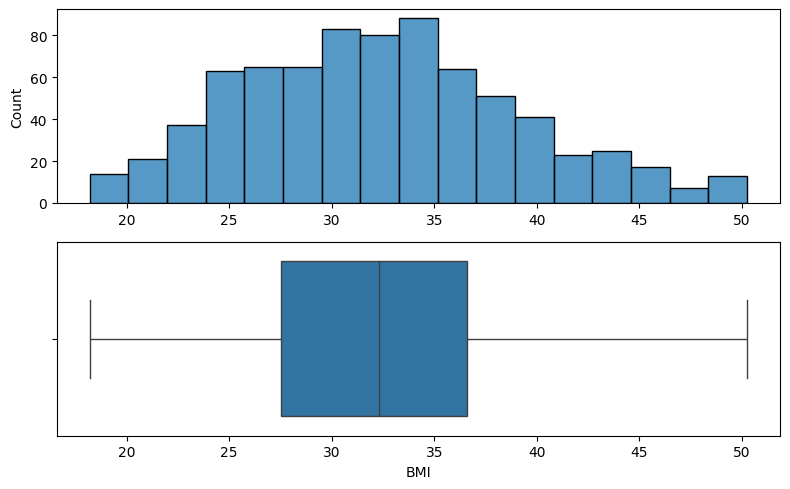

In [13]:
# BMI

# Primero eliminamos valores que consideramos errores.
# Definir el rango
rango_min = 10
rango_max = 70

# Filtrar el DataFrame para mantener solo los valores dentro del rango
data = data[(data['BMI'] >= rango_min) & (data['BMI'] <= rango_max)]



# Ahora vamos a aproximar los valores más lejanos a sus respectivos cuartiles.
variable = 'BMI'

# Calcular el primer y tercer cuartil
Q1 = data[variable].quantile(0.25)
Q3 = data[variable].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Aproximar los valores atípicos a los límites (winsorización)
data[variable] = data[variable].clip(lower=limite_inferior, upper=limite_superior)

# Mostrar los límites calculados
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")



# Crear la figura con 2 subplots en una columna
fig, axis = plt.subplots(2, 1, figsize=(8, 5))

# Histograma y diagrama de caja
sns.histplot(ax=axis[0], data=data, x="BMI").set(xlabel=None)
sns.boxplot(ax=axis[1], data=data, x="BMI")

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()



- En esta variable optamos por eliminar valores inferiores a 10 y 70 porque son imposibles de conseguir. Por tanto deberían ser errores.
- Seguidamente aproximamos los valores más lejanos a los respectivos cuartiles

**La variable "Age" no vamos a modificarla por el momento**

Límite inferior: 40.0
Límite superior: 104.0


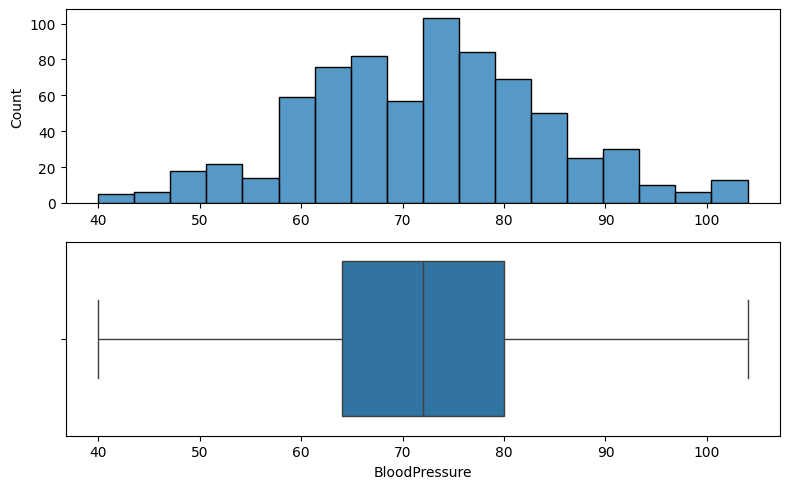

In [14]:
# BloodPressure

# Primero eliminamos valores que consideramos errores.
# Definir el rango
rango_min = 20
rango_max = 150

# Filtrar el DataFrame para mantener solo los valores dentro del rango
data = data[(data['BloodPressure'] >= rango_min) & (data['BloodPressure'] <= rango_max)]



# Ahora vamos a aproximar los valores más lejanos a sus respectivos cuartiles.
variable = 'BloodPressure'

# Calcular el primer y tercer cuartil
Q1 = data[variable].quantile(0.25)
Q3 = data[variable].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Aproximar los valores atípicos a los límites (winsorización)
data[variable] = data[variable].clip(lower=limite_inferior, upper=limite_superior)

# Mostrar los límites calculados
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")



# Crear la figura con 2 subplots en una columna
fig, axis = plt.subplots(2, 1, figsize=(8, 5))

# Histograma y diagrama de caja
sns.histplot(ax=axis[0], data=data, x="BloodPressure").set(xlabel=None)
sns.boxplot(ax=axis[1], data=data, x="BloodPressure")

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

Límite inferior: -49.5
Límite superior: 82.5


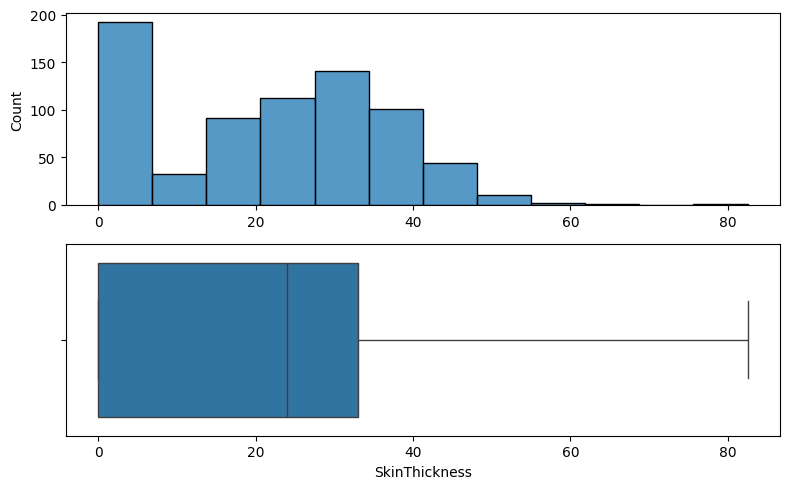

In [15]:
# SkinThickness


# Vamos a aproximar los valores más lejanos a sus respectivos cuartiles.
variable = 'SkinThickness'

# Calcular el primer y tercer cuartil
Q1 = data[variable].quantile(0.25)
Q3 = data[variable].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Aproximar los valores atípicos a los límites (winsorización)
data[variable] = data[variable].clip(lower=limite_inferior, upper=limite_superior)

# Mostrar los límites calculados
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")



# Crear la figura con 2 subplots en una columna
fig, axis = plt.subplots(2, 1, figsize=(8, 5))

# Histograma y diagrama de caja
sns.histplot(ax=axis[0], data=data, x="SkinThickness").set(xlabel=None)
sns.boxplot(ax=axis[1], data=data, x="SkinThickness")

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

Límite inferior: -6.5
Límite superior: 13.5


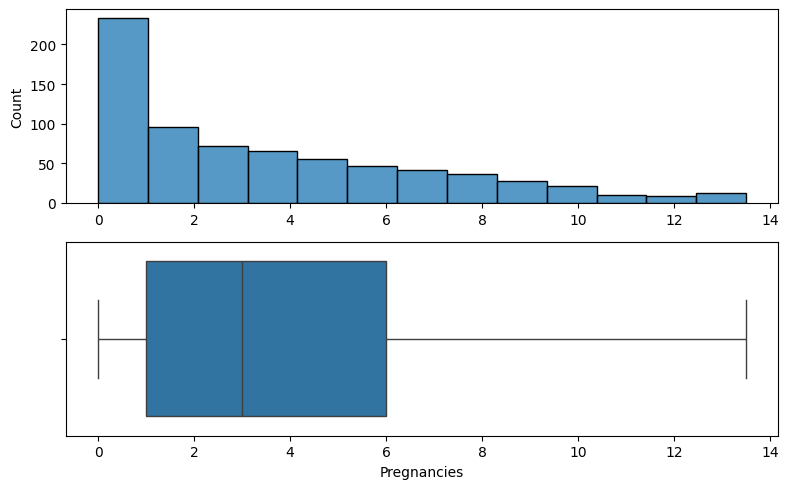

In [16]:
# Pregnancies


# Vamos a aproximar los valores más lejanos a sus respectivos cuartiles.
variable = 'Pregnancies'

# Calcular el primer y tercer cuartil
Q1 = data[variable].quantile(0.25)
Q3 = data[variable].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Aproximar los valores atípicos a los límites (winsorización)
data[variable] = data[variable].clip(lower=limite_inferior, upper=limite_superior)

# Mostrar los límites calculados
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")



# Crear la figura con 2 subplots en una columna
fig, axis = plt.subplots(2, 1, figsize=(8, 5))

# Histograma y diagrama de caja
sns.histplot(ax=axis[0], data=data, x="Pregnancies").set(xlabel=None)
sns.boxplot(ax=axis[1], data=data, x="Pregnancies")

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

Límite inferior: -195.0
Límite superior: 325.0


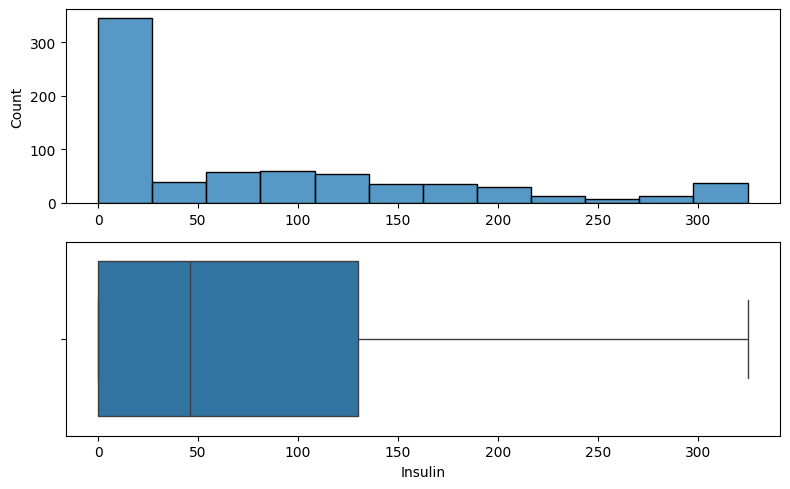

In [17]:
# Insulin


# Vamos a aproximar los valores más lejanos a sus respectivos cuartiles.
variable = 'Insulin'

# Calcular el primer y tercer cuartil
Q1 = data[variable].quantile(0.25)
Q3 = data[variable].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir los límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Aproximar los valores atípicos a los límites (winsorización)
data[variable] = data[variable].clip(lower=limite_inferior, upper=limite_superior)

# Mostrar los límites calculados
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")



# Crear la figura con 2 subplots en una columna
fig, axis = plt.subplots(2, 1, figsize=(8, 5))

# Histograma y diagrama de caja
sns.histplot(ax=axis[0], data=data, x="Insulin").set(xlabel=None)
sns.boxplot(ax=axis[1], data=data, x="Insulin")

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()

### **5.2 Entrenamiento/prueba división de ambos marcos de datos.**

In [18]:
# Separar variables independientes y dependientes
x = data.drop("Outcome", axis = 1)
y = data["Outcome"]

# Dividimos el DataFrame en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
258,1.0,193.0,50,16.0,325,25.9,0.655,24
353,1.0,90.0,62,12.0,43,27.2,0.580,24
740,11.0,120.0,80,37.0,150,42.3,0.785,48
464,10.0,115.0,98,0.0,0,24.0,1.022,34
143,10.0,108.0,66,0.0,0,32.4,0.272,42


### **5.3 Selección de características**

In [19]:
# Selección de caracaterísticas
selector = SelectKBest(score_func=f_classif, k = 5)
selector.fit(x_train, y_train)

# Mostrar las características seleccionadas
ix = selector.get_support()
x_train_sel = pd.DataFrame(selector.transform(x_train), columns = x_train.columns.values[ix])
x_test_sel = pd.DataFrame(selector.transform(x_test), columns = x_test.columns.values[ix])

x_train_sel.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,1.0,193.0,25.9,0.655,24.0
1,1.0,90.0,27.2,0.580,24.0
2,11.0,120.0,42.3,0.785,48.0
3,10.0,115.0,24.0,1.022,34.0
4,10.0,108.0,32.4,0.272,42.0


### GUARDAMOS

In [20]:
# Añadimos nuevamente la variable objetivo y guardamos en archivo .csv en la carpeta /data/procesed
# En este paso añadimos nuevamente la variable objetivo que quitamos con anterioridad a fin de que en el paso anterior al seleccionar k = 5 (por ejemplo) no nos elimine la variable objetivo 
x_train_sel["Outcome"] = list(y_train)
x_test_sel["Outcome"] = list(y_test)

x_train_sel.to_csv("/workspaces/machine-learning-python-template_decision_tree_ds_13_david/data/processed/x_train", index = False)
x_test_sel.to_csv("/workspaces/machine-learning-python-template_decision_tree_ds_13_david/data/processed/x_test", index = False)

## **6 Decision_tree**
